In [20]:
import kcorrect.kcorrect

In [21]:
magnitudes = [19.03456, 17.68546, 16.83543, 16.37342, 16.05186]

In [22]:
magn_error = [0.047312, 0.008814, 0.005808, 0.005822, 0.012825]

In [23]:
ext = [0.239023, 0.175871, 0.127556 ,0.096722, 0.068577]

In [24]:
magn = kcorrect.utils.sdss_asinh_to_maggies(mag = magnitudes, mag_err = magn_error, extinction = ext)

In [25]:
magn

(array([3.0322930e-08, 9.9120747e-08, 2.0741963e-07, 3.0854639e-07,
        4.0428208e-07], dtype=float32),
 array([4.7158070e+18, 1.1321386e+19, 5.4471725e+18, 2.3145764e+18,
        2.6378569e+17], dtype=float32))

In [28]:
redshift = 0.150517

In [29]:
maggies = magn[0]

In [30]:
maggies

array([3.0322930e-08, 9.9120747e-08, 2.0741963e-07, 3.0854639e-07,
       4.0428208e-07], dtype=float32)

In [31]:
ivar = magn[1]

In [32]:
ivar

array([4.7158070e+18, 1.1321386e+19, 5.4471725e+18, 2.3145764e+18,
       2.6378569e+17], dtype=float32)

In [33]:
responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0']
kc = kcorrect.kcorrect.Kcorrect(responses=responses)

In [34]:
coeffs = kc.fit_coeffs(redshift=redshift, maggies=maggies, ivar=ivar)

In [37]:
coeffs

array([1.72934148e-05, 0.00000000e+00, 2.10522270e-06, 2.44595305e-05,
       9.00106906e-07])

In [38]:
k = kc.kcorrect(redshift=redshift, coeffs=coeffs)

In [39]:
k

array([0.33792587, 0.33701633, 0.18408954, 0.06570047, 0.08649098])

In [40]:
absmag = kc.absmag(redshift=redshift, maggies=maggies, ivar=ivar, coeffs=coeffs)

In [41]:
absmag

array([-20.88761803, -22.17269062, -22.82147777, -23.13426584,
       -23.4484657 ])

/tmp/ipykernel_6018/1801864516.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wave), np.log10(spec))


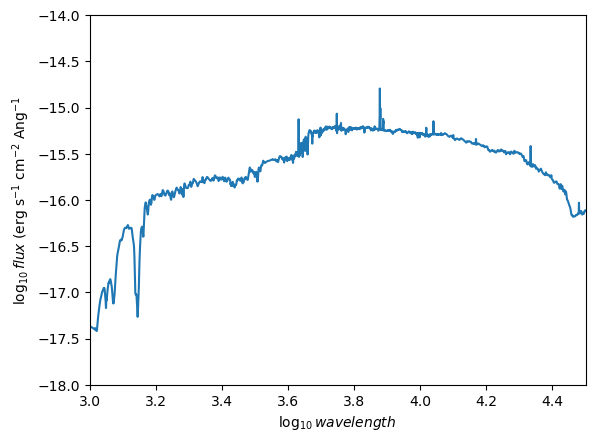

In [42]:
import numpy as np
import matplotlib.pyplot as plt

wave = kc.templates.restframe_wave * (1. + redshift)
spec = coeffs.dot(kc.templates.restframe_flux) / (1. + redshift)

plt.plot(np.log10(wave), np.log10(spec))
plt.xlabel('$\\log_{10} wavelength$')
plt.ylabel('$\\log_{10} flux$ (erg s$^{-1}$ cm$^{-2}$ Ang$^{-1}$')
plt.xlim([3., 4.5])
plt.ylim([-18., -14.])
plt.show()

In [23]:
derived = kc.derived(redshift=redshift, coeffs=coeffs)

# This has one entry per object
stellar_mass = derived['mtol']

# This has one entry per object per output bandpass
mtol = derived['mtol']


In [24]:
mtol

array([1.6829875, 1.6625524, 1.4209064, 1.1802529, 0.906368 ],
      dtype=float32)